In [3]:
from google.colab import drive
drive.mount ('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
%cd '/content/gdrive/MyDrive/BINAR/CHALLENGE/GOLD'

/content/gdrive/MyDrive/BINAR/CHALLENGE/GOLD


In [5]:
!ls

 abusive.csv   '[Data Science] Gold Challenge.pptx'   README.md
 citation.bib   EDA_new.ipynb
 data.csv       new_kamusalay.csv


In [6]:
import numpy as np 
import pandas as pd 
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('data.csv', encoding='latin1')
print(df)

                                                   Tweet  HS  Abusive  \
0      - disaat semua cowok berusaha melacak perhatia...   1        1   
1      RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2      41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3      USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4      USER USER Kaum cebong kapir udah keliatan dong...   1        1   
...                                                  ...  ..      ...   
13164  USER jangan asal ngomong ndasmu. congor lu yg ...   1        1   
13165                       USER Kasur mana enak kunyuk'   0        1   
13166  USER Hati hati bisu :( .g\n\nlagi bosan huft \...   0        0   
13167  USER USER USER USER Bom yang real mudah terdet...   0        0   
13168  USER Mana situ ngasih(": itu cuma foto ya kuti...   1        1   

       HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0                  1         0            0

In [8]:
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [9]:
df.tail()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0
13168,"USER Mana situ ngasih("": itu cuma foto ya kuti...",1,1,1,0,0,0,0,0,1,1,0,0


In [10]:
df.shape

(13169, 13)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [12]:
# Check total missing values pada tiap kolom
df.isna().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [13]:
# Check total duplikasi values/data
df.duplicated().sum()

125

In [14]:
# Menghilangkan data duplikasi
df.drop_duplicates()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
# Membuat kolom baru yaitu total char (panjang karakter dari tiap tweet)
df['total_char'] = df.Tweet.apply(len)

In [16]:
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89


In [17]:
# membuat kolom baru yaitu total word (banyak kata dari tiap tweet)
df['total_word'] = df.Tweet.apply(lambda sent: len(sent.split()))

In [18]:
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138,25
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120,21
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254,37
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75,14
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89,14


In [19]:
# EDA (Exploratory Data Analysis)

In [20]:
# UNIVARIATE ANALYSIS

In [21]:
# Measures of Central Tendency (mendeskripsikan frekuensi suatu kelompok)
# Mean (rata-rata tweet)
df['total_char'].mean()

114.20274887994533

In [22]:
df['total_word'].mean()

17.282101905991343

In [23]:
# Median (nilai tengah)
df['total_char'].median()

100.0

In [24]:
df['total_word'].median()

15.0

In [25]:
# Mode (modus/tweet paling banyak berdasarkan banyaknya jumlah karakter)
df['total_char'].mode()

0    254
Name: total_char, dtype: int64

In [26]:
# Mode (modus/tweet paling banyak bedasarkan banyaknya jumlah kata)
df['total_word'].mode()

0    11
Name: total_word, dtype: int64

In [27]:
# Measures of Spread (mendeskripsikan seberapa menyebar data yang ada)

In [28]:
# RANGE (perbedaan nilai terbesar dan terkecil pada data)
range_total_char = df.total_char.max() - df.total_char.min()
range_total_char

557

In [29]:
range_total_word = df.total_word.max() - df.total_word.min()
range_total_word

51

In [30]:
# QUARTILE & INTERQUARTILE RANGE

In [31]:
# TOTAL CHAR
# mencari nilai minimum dan maksimum
p0 = df.total_char.min()

p100 = df.total_char.max()

# Quartile 1
q1 = df.total_char.quantile(0.25)

# Quartile 2
q2 = df.total_char.quantile(0.50)

# Quartile 3
q3 = df.total_char.quantile(0.75)

# Cari IQR
iqr = q3 - q1

# batas bawah
lower_limit = q1-1.5*iqr

# batas atas
upper_limit = q3+1.5*iqr

# menentukan batas outlier dari data yg kita punya
print("Batas bawah total char:", lower_limit)
print("Nilai minimum:", p0)
if lower_limit < p0:
  print("Tidak ada outlier dari sisi batas bawah")
else:
  print("Ada outlier dari sisi batas bawah")

print()

print("Batas atas total char:", upper_limit)
print("Nilai maksimum:", p100)
if upper_limit > p100:
  print("Tidak ada outlier dari sisi batas atas")
else:
  print("Ada outlier dari sisi batas atas")

print()

# nb : outlier adalah nilai data yg melebihi batas tertentu suatu variabel atau kolom

Batas bawah total char: -80.5
Nilai minimum: 4
Tidak ada outlier dari sisi batas bawah

Batas atas total char: 291.5
Nilai maksimum: 561
Ada outlier dari sisi batas atas



In [32]:
# TOTAL WORD
# mencari nilai minimum dan maksimum
p0 = df.total_word.min()

p100 = df.total_word.max()

# Quartile 1
q1 = df.total_word.quantile(0.25)

# Quartile 2
q2 = df.total_word.quantile(0.50)

# Quartile 3
q3 = df.total_word.quantile(0.75)

# Cari IQR
iqr = q3 - q1

# batas bawah
lower_limit = q1-1.5*iqr

# batas atas
upper_limit = q3+1.5*iqr

# menentukan batas outlier dari data yg kita punya
print("Batas bawah total word:", lower_limit)
print("Nilai minimum:", p0)
if lower_limit < p0:
  print("Tidak ada outlier dari sisi batas bawah")
else:
  print("Ada outlier dari sisi batas bawah")

print()

print("Batas atas total word:", upper_limit)
print("Nilai maksimum:", p100)
if upper_limit > p100:
  print("Tidak ada outlier dari sisi batas atas")
else:
  print("Ada outlier dari sisi batas atas")

print()

# nb : outlier adalah nilai data yg melebihi batas tertentu suatu variabel atau kolom

Batas bawah total word: -12.0
Nilai minimum: 1
Tidak ada outlier dari sisi batas bawah

Batas atas total word: 44.0
Nilai maksimum: 52
Ada outlier dari sisi batas atas



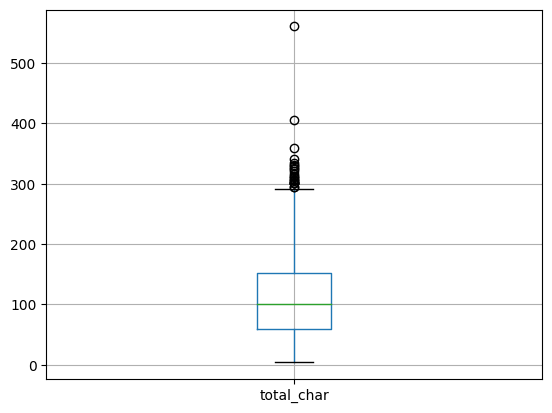

In [33]:
boxplot = df.boxplot(column=['total_char'])

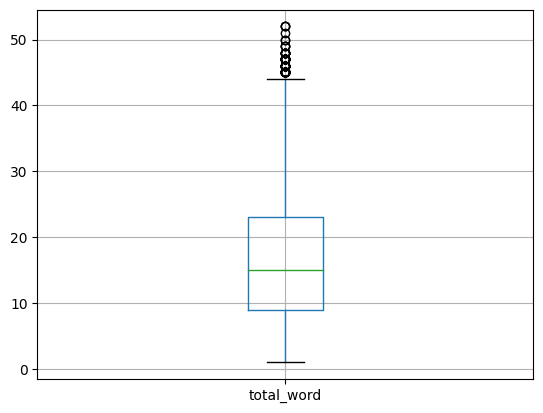

In [34]:
boxplot = df.boxplot(column=['total_word'])

In [35]:
# VARIANCE (mengukur seberapa jauh jarak data tersebar dari mean-nya)
df['total_char'].mean()

114.20274887994533

In [36]:
df['total_word'].mean()

17.282101905991343

In [37]:
df['total_char'].var()

4771.441271300923

In [38]:
df['total_word'].var()

104.69327091579908

In [39]:
# STANDARD DEVIATION (mengukur seberapa banyak penyebaran data dari mean-nya)
df['total_char'].std()

69.07561994872665

In [40]:
df['total_word'].std()

10.231972972784822

In [41]:
# Measures to Describe Shape of Distribution (mendeskripsikan distribusi atau persebaran data berdasarkan grafik)

In [42]:
# SKEWNESS (mengukur ketidaksimetrisan suatu distribusi nilai)
df['total_char'].skew()

0.6936249210360277

In [43]:
df['total_word'].skew()

0.7869089925046647

In [44]:
# KURTOSIS (menunjukkan derajat keruncingan)
df['total_char'].kurtosis()

-0.40117416025860564

In [45]:
df['total_word'].kurtosis()

-0.14951585422523994

In [46]:
# VISUALIZATION

<Axes: ylabel='HS'>

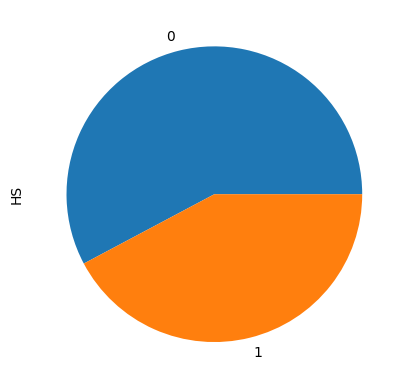

In [47]:
# PIE CHART
# Melihat perbandingan seberapa banyak tweet terdapat kata-kata hate speech
df.groupby('HS').HS.count().plot(kind='pie')

<Axes: ylabel='Abusive'>

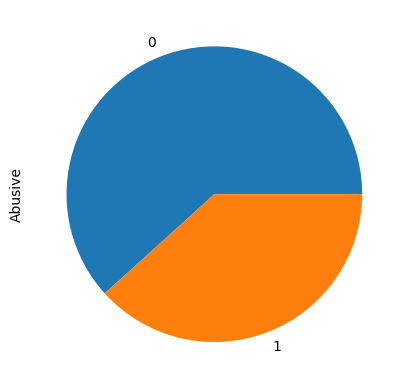

In [48]:
# Melihat perbandingan seberapa banyak tweet terdapat kata-kata abusive
df.groupby('Abusive').Abusive.count().plot(kind='pie')

<Axes: >

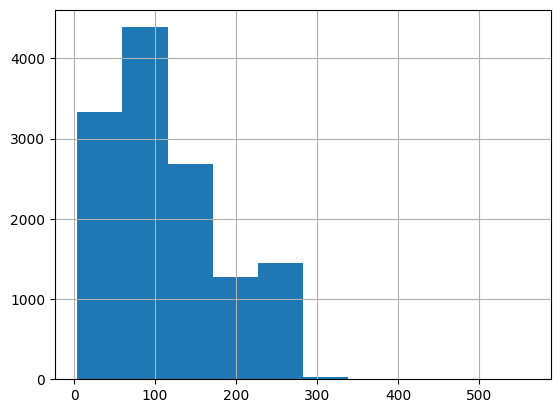

In [49]:
# HISTOGRAM
df.total_char.hist()
# rata2 panjang karakter dalam sebuah tweet mengenai kecelakaan adalah 100 - 150 karakter

<Axes: >

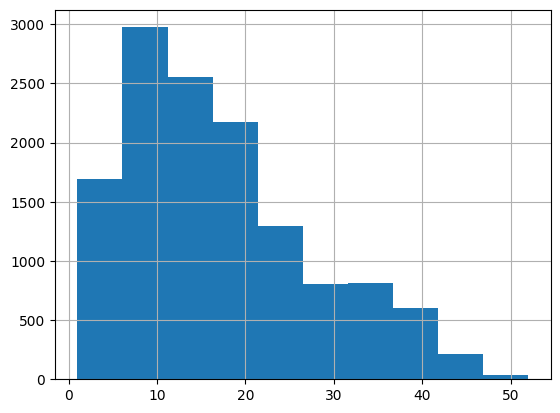

In [50]:
df.total_word.hist()
# rata2 banyak kata dalam sebuah tweet mengenai kecelakaan adalah 10 - 20 kata

In [51]:
# BIVARIATE ANALYSIS

In [52]:
# PEARSON CORRELATION
df.corr()
# Korelasi antar kolom/varibel bernilai positif, artinya antar variabel saling berkaitan satu sama lain

<ipython-input-52-d0fcf8e64cf3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word
HS,1.000000,0.368595,0.713998,0.492912,0.296077,0.247873,0.185471,0.180405,0.736651,0.687713,0.451079,0.225765,-0.148950,-0.129296
Abusive,0.368595,1.000000,0.289782,0.148622,0.070476,-0.028304,0.196235,0.187492,0.264936,0.313377,0.188486,-0.097490,-0.212749,-0.194017
HS_Individual,0.713998,0.289782,1.000000,-0.257246,0.035690,-0.000549,0.213400,0.182398,0.637545,0.963186,-0.235414,0.058354,-0.140994,-0.119682
HS_Group,0.492912,0.148622,-0.257246,1.000000,0.364294,0.342798,-0.009207,0.022328,0.224446,-0.247776,0.915132,0.239084,-0.030366,-0.029724
HS_Religion,0.296077,0.070476,0.035690,0.364294,1.000000,0.095878,-0.002993,0.024522,-0.159422,0.035277,0.343558,0.083226,-0.005674,0.003535
HS_Race,0.247873,-0.028304,-0.000549,0.342798,0.095878,1.000000,-0.028763,-0.020260,-0.133467,-0.007199,0.239469,0.242798,-0.057099,-0.048548
HS_Physical,0.185471,0.196235,0.213400,-0.009207,-0.002993,-0.028763,1.000000,0.053750,-0.099867,0.220254,0.000265,-0.025330,-0.043721,-0.035512
HS_Gender,0.180405,0.187492,0.182398,0.022328,0.024522,-0.020260,0.053750,1.000000,-0.097139,0.189647,0.029100,-0.018936,-0.024621,-0.017160
HS_Other,0.736651,0.264936,0.637545,0.224446,-0.159422,-0.133467,-0.099867,-0.097139,1.000000,0.606733,0.225106,0.124581,-0.110261,-0.102027
HS_Weak,0.687713,0.313377,0.963186,-0.247776,0.035277,-0.007199,0.220254,0.189647,0.606733,1.000000,-0.226747,-0.113487,-0.131945,-0.108991


<Axes: xlabel='total_char', ylabel='total_word'>

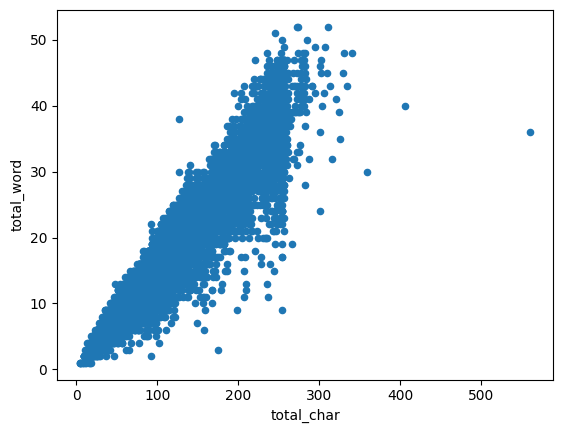

In [53]:
# SCATTER PLOT
df.plot(x = 'total_char', y = 'total_word', kind = 'scatter')
# korelasi positif dibuktikan dengan visualisasi sebagai berikut

<Axes: xlabel='HS'>

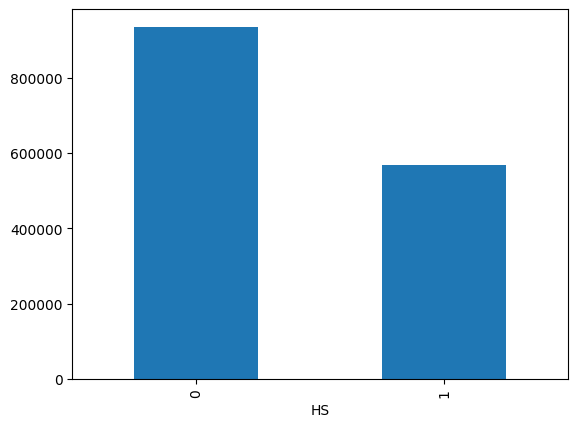

In [54]:
# BARCHART
df.groupby('HS').total_char.sum().plot(kind = 'bar')

<Axes: xlabel='Abusive'>

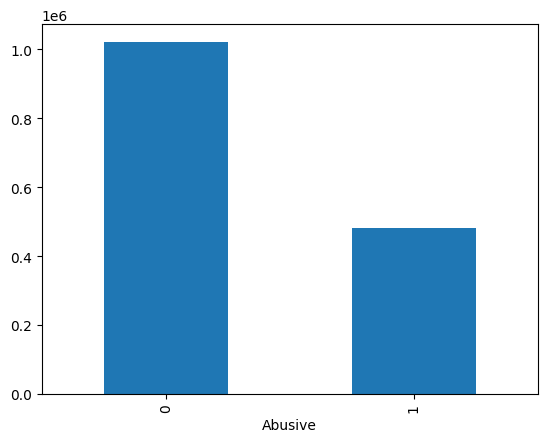

In [55]:
df.groupby('Abusive').total_char.sum().plot(kind = 'bar')

<Axes: xlabel='HS'>

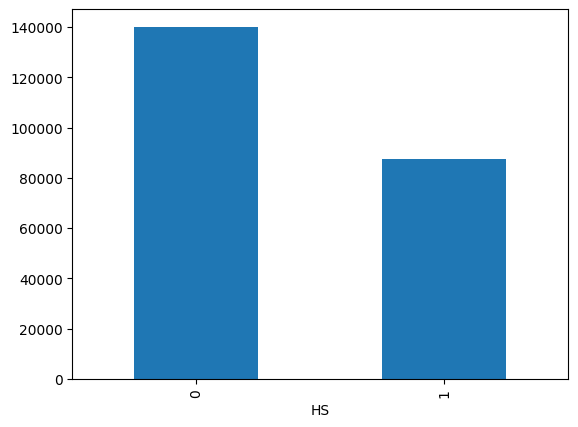

In [56]:
df.groupby('HS').total_word.sum().plot(kind = 'bar')

<Axes: xlabel='Abusive'>

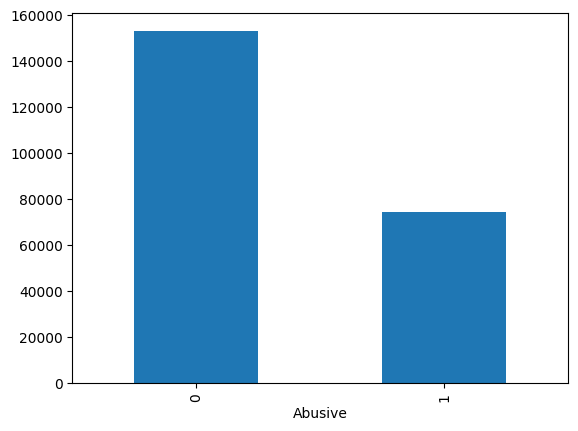

In [57]:
df.groupby('Abusive').total_word.sum().plot(kind = 'bar')

In [58]:
# Membaca dataset kamus alay
kamus_alay = pd.read_csv("new_kamusalay.csv", encoding='latin1',header=None)
kamus_alay = kamus_alay.rename(columns={0:'Alay',1:'Baku'})

print(kamus_alay)

                      Alay                               Baku
0      anakjakartaasikasik           anak jakarta asyik asyik
1             pakcikdahtua                  pak cik sudah tua
2           pakcikmudalagi                  pak cik muda lagi
3              t3tapjokowi                       tetap jokowi
4                       3x                          tiga kali
...                    ...                                ...
15162            mendikbud  menteri pendidikan dan kebudayaan
15163               mendag                menteri perdagangan
15164              menaker               menteri tenaga kerja
15165             memetwit                            mentwit
15166             megangin                           memegang

[15167 rows x 2 columns]


In [59]:
# Memetakan kata Alay menjadi key dan kata Baku menjadi value yang berkaitan satu sama lain
kamus_alay_map = dict(zip(kamus_alay['Alay'], kamus_alay['Baku']))

In [60]:
# Membaca dataset abusive words
kata_kasar = pd.read_csv("abusive.csv",encoding='latin1')

print(kata_kasar)

         ABUSIVE
0           alay
1          ampas
2           buta
3        keparat
4         anjing
..           ...
120        rezim
121        sange
122       serbet
123        sipit
124  transgender

[125 rows x 1 columns]


In [61]:
#Membuat kata-kata abusive menjadi "cencored" dengan membuat kolom baru
kata_kasar['Kata_Sensor'] = "cencored"

print(kata_kasar)

         ABUSIVE Kata_Sensor
0           alay    cencored
1          ampas    cencored
2           buta    cencored
3        keparat    cencored
4         anjing    cencored
..           ...         ...
120        rezim    cencored
121        sange    cencored
122       serbet    cencored
123        sipit    cencored
124  transgender    cencored

[125 rows x 2 columns]


In [62]:
# Memetakan kata-kata ABUSIVE menjadi key dan kata "cencored" menjadi value yang berkaitan satu sama lain
kata_kasar_map = dict(zip(kata_kasar['ABUSIVE'], kata_kasar['Kata_Sensor']))

In [63]:
def normalize_alay(text):
    return ' '.join([kamus_alay_map[word]
    if
        word in kamus_alay_map 
    
    else
        word for word in text.split(' ')])

In [64]:
def normalize_abusive(text):
    return ' '.join([kata_kasar_map[word]
    if
        word in kata_kasar_map 
                
    else
        word for word in text.split(' ')])

In [65]:
def cleansing_kata(text):
    # Menghapus karakter non-alfanumerik
    text = re.sub(r'[^\w\s]', ' ', text)
    
    # Menghapus whitespace tambahan
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Mengubah semua huruf menjadi huruf kecil
    text = text.lower()

    # Menghilangkan URL
    text= re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text)

    # Menghilangkan non alpha numeric
    text = re.sub('[^0-9a-zA-Z]+',' ',text)

    # Mengilangkan angka atau digit
    text = re.sub(r'\d+', ' ', text)

    # Menghilangkan enter
    text = re.sub('\n',' ',text)

    # Menghilangkan tab
    text = re.sub('\t',' ',text)

    # Menghilangkan kata RT
    text = re.sub('rt',' ',text)

    # Menghilangkan kata user
    text = re.sub('user',' ',text)

    # Menghilangkan whitespace
    text = text.strip()

    # Membuat map terhadap kata-kata "alay" dan mengubahnya menjadi kata baku
    text = normalize_alay(text)

    # Mengganti kata kasar dengan kata "cencored" yang telah didefinisikan sebelumnya
    text = normalize_abusive(text)
    
    return text

In [66]:
# Menjalankan function cleansing
def cleansing_data(text):
    text = cleansing_kata(text)
    text = normalize_alay(text)
    text = normalize_abusive(text)
    
    return text

In [67]:
df = pd.read_csv('data.csv', encoding='latin1')
df['Tweet'] = df['Tweet'].apply(cleansing_data)
df['Tweet']

0        di saat semua cowok berusaha melacak perhatian...
1        siapa yang telat memberi tau kamu cencored cen...
2        kadang aku berpikir kenapa aku tetap percaya p...
3        aku itu aku dan ku tau matamu cencored tapi di...
4        kaum cencored cencored sudah kelihatan dongokn...
                               ...                        
13164    jangan asal berbicara ndasmu cencored kamu yan...
13165                             kasur mana enak cencored
13166    hati hati cencored tidak dan lagi bosan aduh x...
13167    bom yang real mudah terdeteksi bom yang terkub...
13168    mana situ memberi itu cuma foto ya kutil cencored
Name: Tweet, Length: 13169, dtype: object

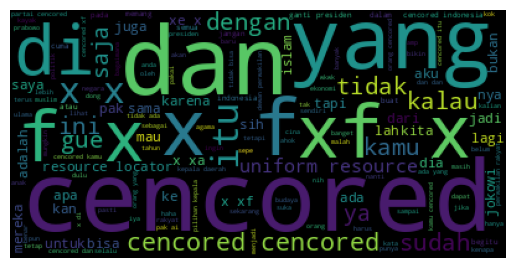

In [68]:
# WORDCLOUD
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = ' '.join(df['Tweet'])
wordcloud = WordCloud().generate(text)

# Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()